In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
files.upload()

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 97% 211M/218M [00:01<00:00, 115MB/s]
100% 218M/218M [00:01<00:00, 133MB/s]


In [5]:
import zipfile

zipref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zipref.extractall('/content/cats_and_dogs')
zipref.close()

In [6]:
import os

count = 0
for dirpath, dirnames, filenames in os.walk('/content/cats_and_dogs'):
  value = os.path.basename(dirpath) if len(filenames)>0 else 'No_Files'
  if value!= 'No_Files':
    print("The files in {}({}) is {}{}".format(value, os.path.basename(os.path.dirname(dirpath)), len(filenames), '\n' if count==1 else ''))
    count+=1

The files in cats(training_set) is 4001
The files in dogs(training_set) is 4006

The files in cats(test_set) is 1012
The files in dogs(test_set) is 1013


In [16]:
import random

def random_img(dir = 'training_set', type_1 = 'cats', n_samples = 1):
  '''
  Accessing the dataset to visualize the image
  '''
  filepath = os.path.join('/content/cats_and_dogs', dir) + '/' + dir + '/' + type_1
  files = [os.path.join(filepath, f) for f in os.listdir(filepath)]
  if n_samples > 1:
    fig, ax = plt.subplots(int(n_samples / 2), 2)
    fig.set_facecolor('black')
    if n_samples == 2:
      for s in range(2):
        random_file = random.sample(range(0, len(files)-1), n_samples)
        for i in random_file:
          img = cv2.imread(files[i])
          ax[s].imshow(img)
          ax[s].axis('off')
    else:
      for f in range(len(ax)):
        for s in range(2):
          random_file = random.sample(range(0, len(files)-1), n_samples)
          for i in random_file:
            img = cv2.imread(files[i])
            ax[f, s].imshow(img)
            ax[f, s].axis('off')

  else:
    random_file = random.randint(0, len(files)-1)
    plt.figure(facecolor = 'black')
    img = cv2.imread(files[random_file])
    cv2.resize(img, (128, 128))
    cv2_imshow(img)

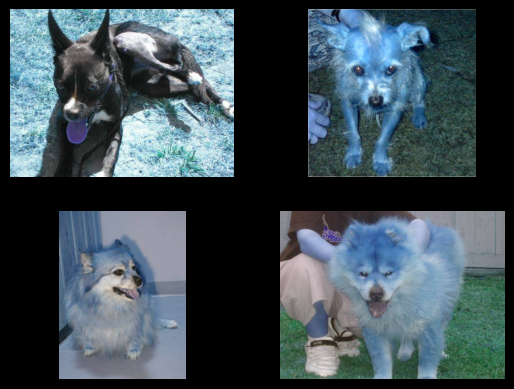

In [17]:
random_img(dir = 'training_set', type_1 = 'dogs', n_samples = 4)

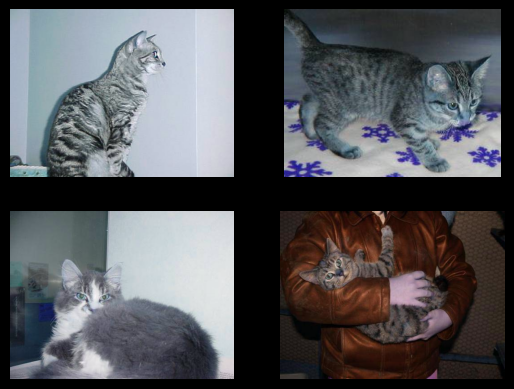

In [18]:
random_img(dir = 'training_set', type_1 = 'cats', n_samples = 4)

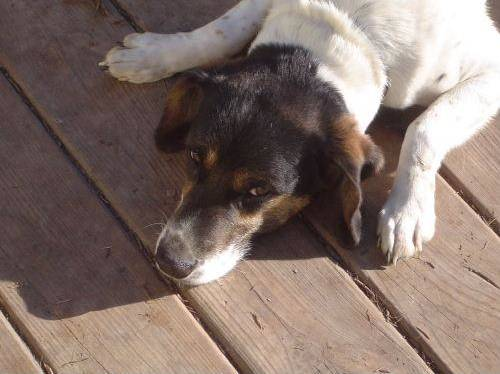

<Figure size 640x480 with 0 Axes>

In [10]:
random_img(dir = 'training_set', type_1 = 'dogs', n_samples = 1)

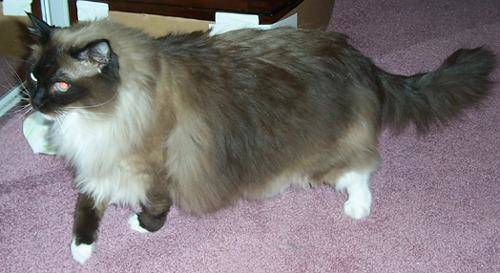

<Figure size 640x480 with 0 Axes>

In [11]:
random_img(dir = 'training_set', type_1 = 'cats', n_samples = 1)

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/cats_and_dogs/training_set/training_set'
test_dir = '/content/cats_and_dogs/test_set/test_set'


datagen = ImageDataGenerator(rescale = 1/255.)

train_datagen = datagen.flow_from_directory(train_dir,
                                            shuffle = True,
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            target_size = (128, 128))

test_datagen = datagen.flow_from_directory(test_dir,
                                           shuffle = True,
                                           batch_size = 32,
                                           class_mode = 'binary',
                                           target_size = (128, 128))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [7]:
from tensorflow.keras import Sequential as SQ
from tensorflow.random import set_seed as SEED
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.losses import BinaryFocalCrossentropy as BCE
from tensorflow.keras.optimizers import Adam

In [32]:
SEED(28)

model = SQ()
model.add(Conv2D(filters = 32,
                 kernel_size = 3,
                 strides = 1,
                 padding = 'valid',
                 input_shape = (128, 128, 3),
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = 3, strides = 1, padding = 'valid'))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = BCE(),
              optimizer = Adam(),
              metrics = ['accuracy'])

history = model.fit(train_datagen, epochs = 5, steps_per_epoch = len(train_datagen), validation_data = test_datagen, validation_steps = len(test_datagen))

Epoch 1/5
251/251 [==============================] - 226s 892ms/step - loss: 0.5354 - accuracy: 0.6041 - val_loss: 0.1598 - val_accuracy: 0.6713
Epoch 2/5
251/251 [==============================] - 236s 942ms/step - loss: 0.1368 - accuracy: 0.7384 - val_loss: 0.1612 - val_accuracy: 0.6752
Epoch 3/5
251/251 [==============================] - 225s 897ms/step - loss: 0.1067 - accuracy: 0.8104 - val_loss: 0.1840 - val_accuracy: 0.6792
Epoch 4/5
251/251 [==============================] - 232s 924ms/step - loss: 0.0793 - accuracy: 0.8755 - val_loss: 0.2055 - val_accuracy: 0.6792
Epoch 5/5
251/251 [==============================] - 225s 895ms/step - loss: 0.0558 - accuracy: 0.9181 - val_loss: 0.2475 - val_accuracy: 0.6812


<Axes: >

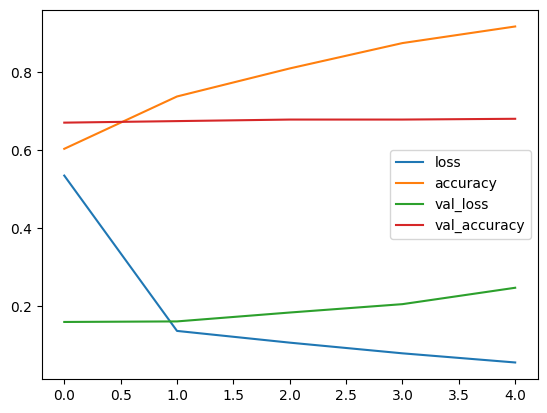

In [34]:
pd.DataFrame(history.history).plot()

Looks like our model performs poorly on the data

In [36]:
SEED(28)

model_1 = SQ()
model_1.add(Conv2D(filters = 32,
                 kernel_size = 3,
                 strides = 2,
                 padding = 'valid',
                 input_shape = (128, 128, 3),
                 activation = 'relu'))
model_1.add(MaxPool2D(pool_size = 2, strides = 1, padding = 'valid'))
model_1.add(Conv2D(filters = 32,
                 kernel_size = 3,
                 strides = 2,
                 padding = 'valid',
                 activation = 'relu'))
model_1.add(MaxPool2D(pool_size = 2, strides = 1, padding = 'valid'))
model_1.add(Conv2D(filters = 32,
                 kernel_size = 3,
                 strides = 2,
                 padding = 'valid',
                 activation = 'relu'))
model_1.add(MaxPool2D(pool_size = 2, strides = 1, padding = 'valid'))
model_1.add(Flatten())
model_1.add(Dense(1, activation = 'sigmoid'))

model_1.compile(loss = BCE(),
              optimizer = Adam(),
              metrics = ['accuracy'])

history_1 = model_1.fit(train_datagen, epochs = 5, steps_per_epoch = len(train_datagen), validation_data = test_datagen, validation_steps = len(test_datagen))

Epoch 1/5
251/251 [==============================] - 73s 283ms/step - loss: 0.1604 - accuracy: 0.6281 - val_loss: 0.1497 - val_accuracy: 0.7000
Epoch 2/5
251/251 [==============================] - 66s 265ms/step - loss: 0.1426 - accuracy: 0.7077 - val_loss: 0.1568 - val_accuracy: 0.6678
Epoch 3/5
251/251 [==============================] - 66s 264ms/step - loss: 0.1328 - accuracy: 0.7387 - val_loss: 0.1297 - val_accuracy: 0.7533
Epoch 4/5
251/251 [==============================] - 70s 278ms/step - loss: 0.1222 - accuracy: 0.7693 - val_loss: 0.1283 - val_accuracy: 0.7642
Epoch 5/5
251/251 [==============================] - 65s 260ms/step - loss: 0.1145 - accuracy: 0.7928 - val_loss: 0.1249 - val_accuracy: 0.7657


<Axes: >

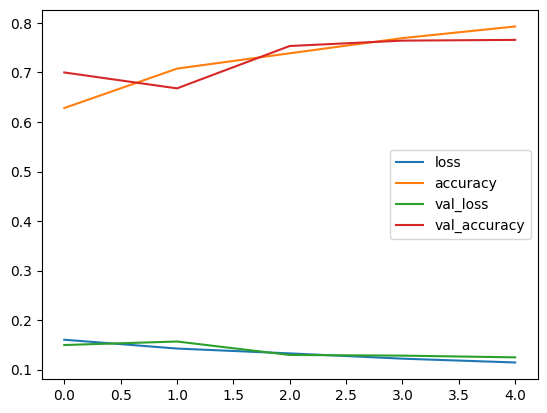

In [37]:
pd.DataFrame(history_1.history).plot()

Our model performs well

In [38]:
SEED(28)

model_1 = SQ()
model_1.add(Conv2D(filters = 32,
                 kernel_size = 3,
                 strides = 2,
                 padding = 'valid',
                 input_shape = (128, 128, 3),
                 activation = 'relu'))
model_1.add(MaxPool2D(pool_size = 2, strides = 1, padding = 'valid'))
model_1.add(Conv2D(filters = 32,
                 kernel_size = 3,
                 strides = 2,
                 padding = 'valid',
                 activation = 'relu'))
model_1.add(MaxPool2D(pool_size = 2, strides = 1, padding = 'valid'))
model_1.add(Conv2D(filters = 32,
                 kernel_size = 3,
                 strides = 2,
                 padding = 'valid',
                 activation = 'relu'))
model_1.add(MaxPool2D(pool_size = 2, strides = 1, padding = 'valid'))
model_1.add(Flatten())
model_1.add(Dense(1, activation = 'sigmoid'))

model_1.compile(loss = BCE(),
              optimizer = Adam(),
              metrics = ['accuracy'])

history_1 = model_1.fit(train_datagen, epochs = 10, steps_per_epoch = len(train_datagen), validation_data = test_datagen, validation_steps = len(test_datagen))

Epoch 1/10
251/251 [==============================] - 72s 282ms/step - loss: 0.1631 - accuracy: 0.6065 - val_loss: 0.1512 - val_accuracy: 0.6772
Epoch 2/10
251/251 [==============================] - 66s 263ms/step - loss: 0.1475 - accuracy: 0.6937 - val_loss: 0.1504 - val_accuracy: 0.6782
Epoch 3/10
251/251 [==============================] - 62s 248ms/step - loss: 0.1345 - accuracy: 0.7398 - val_loss: 0.1529 - val_accuracy: 0.6886
Epoch 4/10
251/251 [==============================] - 69s 274ms/step - loss: 0.1271 - accuracy: 0.7628 - val_loss: 0.1288 - val_accuracy: 0.7692
Epoch 5/10
251/251 [==============================] - 70s 277ms/step - loss: 0.1190 - accuracy: 0.7828 - val_loss: 0.1310 - val_accuracy: 0.7652
Epoch 6/10
251/251 [==============================] - 67s 267ms/step - loss: 0.1105 - accuracy: 0.8027 - val_loss: 0.1319 - val_accuracy: 0.7454
Epoch 7/10
251/251 [==============================] - 68s 270ms/step - loss: 0.1040 - accuracy: 0.8197 - val_loss: 0.1180 - val_ac

<Axes: >

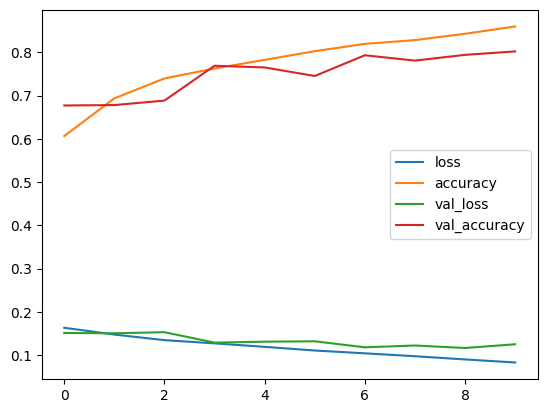

In [39]:
pd.DataFrame(history_1.history).plot()

In [40]:
model_1.evaluate(test_datagen)

64/64 [==============================] - 5s 79ms/step - loss: 0.1250 - accuracy: 0.8023


[0.12498069554567337, 0.8022738695144653]

In [8]:
import random

def predicting_img(n = 1, class_n = 'cats', model = None):
  filebase = os.path.join(test_dir, class_n)
  files = [os.path.join(filebase, f) for f in os.listdir(filebase)]
  if n > 1:
    random_img = random.sample(range(0, len(files)), n)
    for i in random_img:
      img = cv2.imread(files[i])
      img_resize = cv2.resize(img, (128, 128))
      img_grey = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
      if model == model_2:
        img_array = np.array(img_grey)/255.
        img_array = img_array.reshape(1, 128, 128, 1)
      else:
        img_array = np.array(img_resize)/255.
        img_array = img_array.reshape(1, 128, 128, 3)
      prediction = model.predict(img_array)
      class_name_pred = 'cats' if prediction > 0.5 else 'dogs'
      class_name_exp = os.path.basename(os.path.dirname(files[i]))
      cv2.putText(img, 'Predicted: ' + class_name_pred, (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.7, (0, 255, 0) if class_name_pred == class_name_exp else (0, 0, 255), 1)
      cv2.putText(img, 'Expected: ' + class_name_exp, (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.7, (0, 255, 0), 1)
      cv2_imshow(img)

1/1 [==============================] - 0s 26ms/step


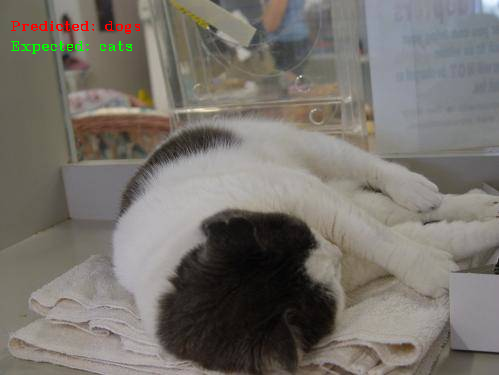

1/1 [==============================] - 0s 24ms/step


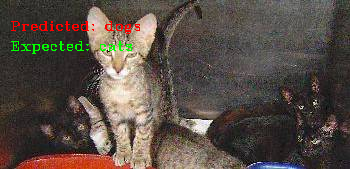

1/1 [==============================] - 0s 24ms/step


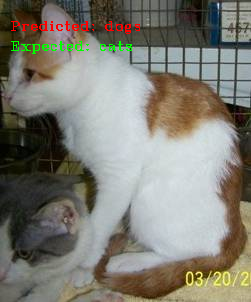

1/1 [==============================] - 0s 34ms/step


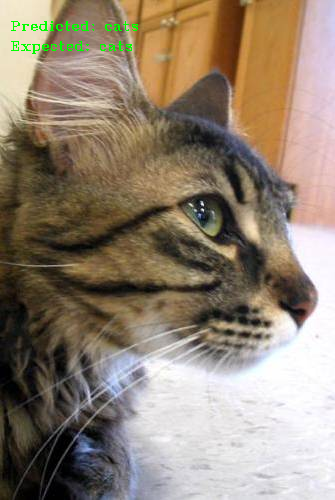

1/1 [==============================] - 0s 25ms/step


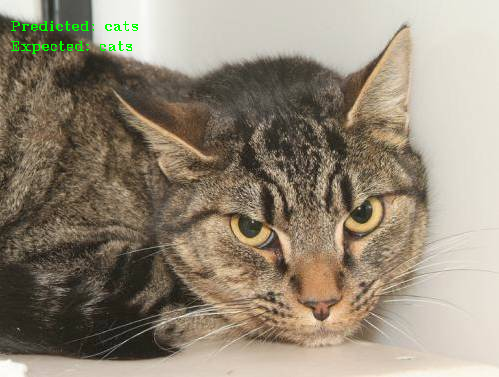

In [105]:
predicting_img(5, class_n = 'cats')

1/1 [==============================] - 0s 27ms/step


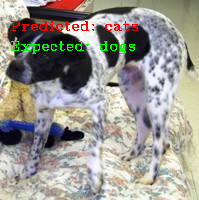

1/1 [==============================] - 0s 23ms/step


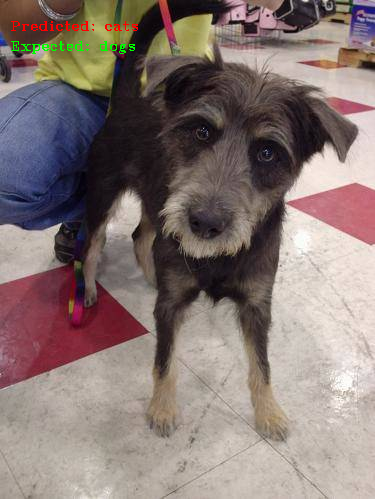

1/1 [==============================] - 0s 22ms/step


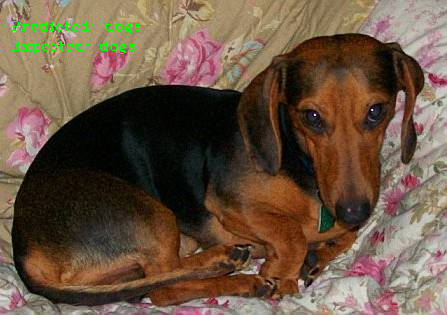

1/1 [==============================] - 0s 42ms/step


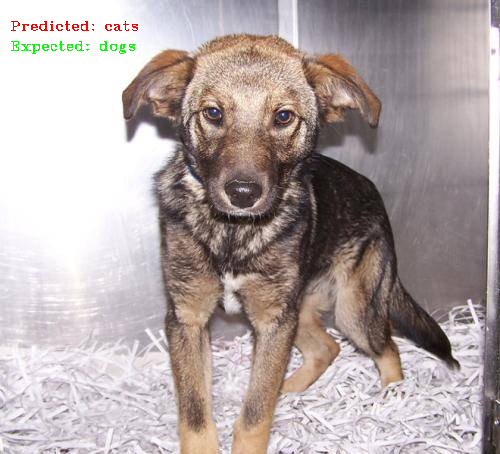

1/1 [==============================] - 0s 30ms/step


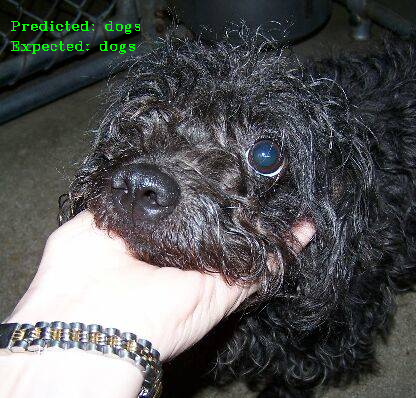

In [104]:
predicting_img(n = 5, class_n = 'dogs')

Only two out of five seems to be right

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/cats_and_dogs/training_set/training_set'
test_dir = '/content/cats_and_dogs/test_set/test_set'

datagen = ImageDataGenerator(rescale = 1/255.,
                             shear_range = 0.2,
                             rotation_range = 0.3,
                             height_shift_range = 0.2,
                             width_shift_range = 0.2,
                             zoom_range = 0.2)

train_datagen = datagen.flow_from_directory(train_dir,
                                            shuffle = True,
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            target_size = (128, 128),
                                            color_mode = 'grayscale')

test_datagen = datagen.flow_from_directory(test_dir,
                                           shuffle = True,
                                           batch_size = 32,
                                           class_mode = 'binary',
                                           target_size = (128, 128),
                                           color_mode = 'grayscale')


SEED(28)

model_2 = SQ()
model_2.add(Conv2D(filters = 64,
                 kernel_size = 5,
                 strides = 3,
                 padding = 'valid',
                 input_shape = (128, 128, 1),
                 activation = 'relu'))
model_2.add(MaxPool2D(pool_size = 2, strides = 1, padding = 'valid'))
model_2.add(Conv2D(filters = 32,
                 kernel_size = 3,
                 strides = 2,
                 padding = 'valid',
                 activation = 'relu'))
model_2.add(MaxPool2D(pool_size = 2, strides = 1, padding = 'valid'))
model_2.add(Flatten())
model_2.add(Dense(100, activation = 'relu'))
model_2.add(Dense(100, activation = 'relu'))
model_2.add(Dense(1, activation = 'sigmoid'))

model_2.compile(loss = BCE(),
              optimizer = Adam(),
              metrics = ['accuracy'])

history_2 = model_2.fit(train_datagen, epochs = 15, steps_per_epoch = len(train_datagen), validation_data = test_datagen, validation_steps = len(test_datagen))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/15
251/251 [==============================] - 73s 283ms/step - loss: 0.1734 - accuracy: 0.5292 - val_loss: 0.1711 - val_accuracy: 0.5245
Epoch 2/15
251/251 [==============================] - 69s 275ms/step - loss: 0.1705 - accuracy: 0.5723 - val_loss: 0.1667 - val_accuracy: 0.6228
Epoch 3/15
251/251 [==============================] - 71s 284ms/step - loss: 0.1655 - accuracy: 0.6114 - val_loss: 0.1628 - val_accuracy: 0.6317
Epoch 4/15
251/251 [==============================] - 69s 273ms/step - loss: 0.1633 - accuracy: 0.6270 - val_loss: 0.1601 - val_accuracy: 0.6396
Epoch 5/15
251/251 [==============================] - 71s 282ms/step - loss: 0.1597 - accuracy: 0.6456 - val_loss: 0.1590 - val_accuracy: 0.6555
Epoch 6/15
251/251 [==============================] - 69s 275ms/step - loss: 0.1578 - accuracy: 0.6483 - val_loss: 0.1581 - val_accuracy: 0.6490
Epoch 7/15
251/251 [==========================

<Axes: >

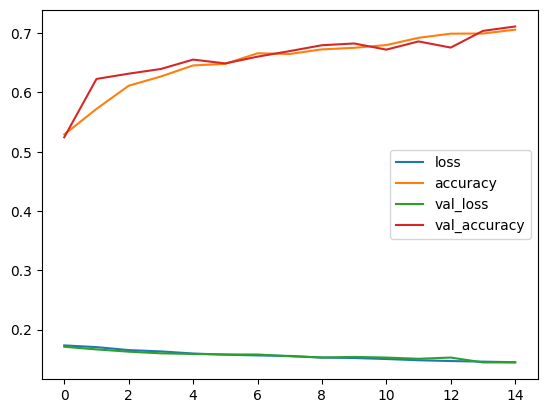

In [18]:
pd.DataFrame(history_2.history).plot()

1/1 [==============================] - 0s 73ms/step


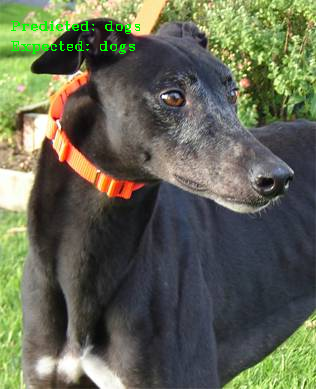

1/1 [==============================] - 0s 18ms/step


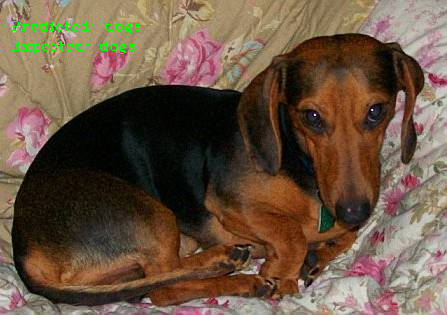

1/1 [==============================] - 0s 22ms/step


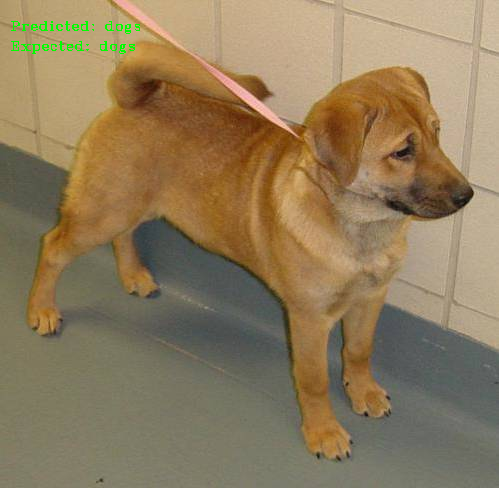

1/1 [==============================] - 0s 20ms/step


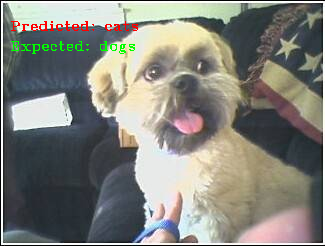

1/1 [==============================] - 0s 24ms/step


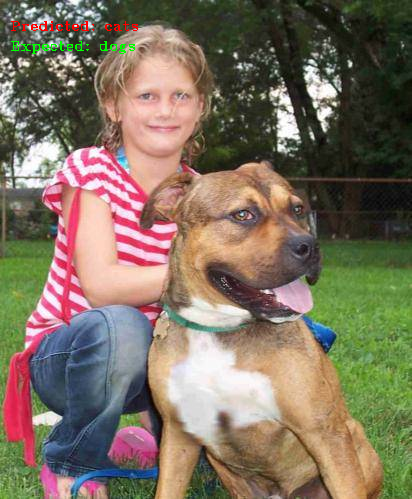

In [24]:
predicting_img(n = 5, class_n = 'dogs', model = model_2)

1/1 [==============================] - 0s 29ms/step


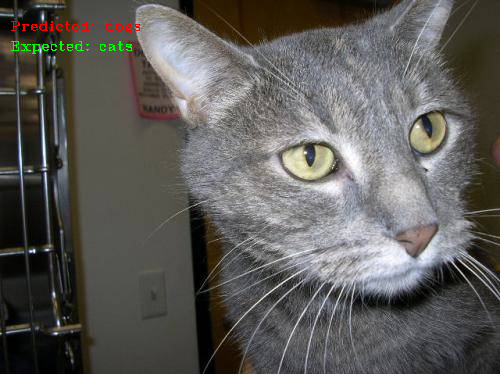

1/1 [==============================] - 0s 18ms/step


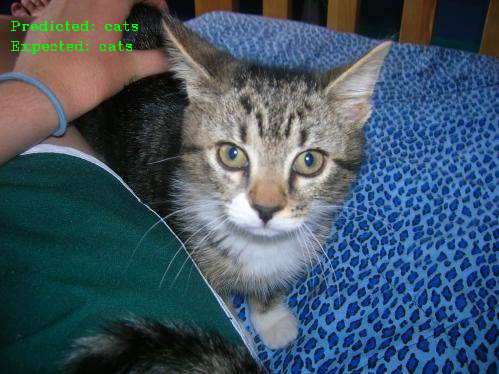

1/1 [==============================] - 0s 24ms/step


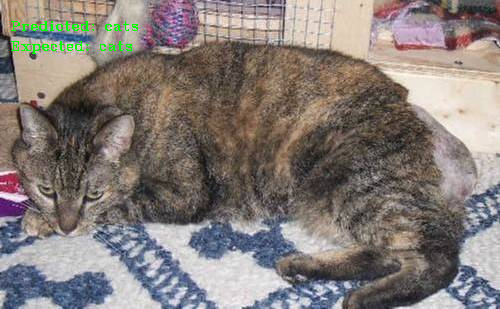

1/1 [==============================] - 0s 27ms/step


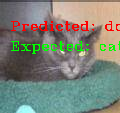

1/1 [==============================] - 0s 17ms/step


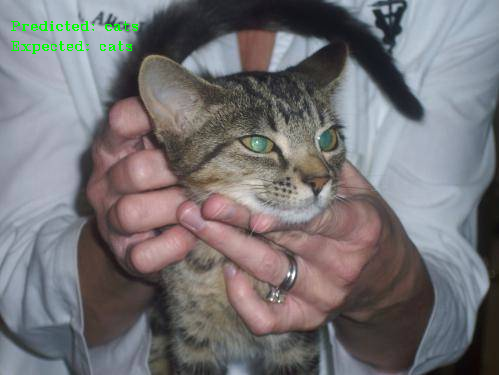

In [25]:
predicting_img(n = 5, class_n = 'cats', model = model_2)

Model performs better than the one before

In [19]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 42, 42, 64)        1664      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 41, 41, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 19, 19, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 11552)             0         
                                                                 
 dense_4 (Dense)             (None, 100)              